# Iris dataset

In [4]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#importing datasets

from sklearn import datasets

iris = datasets.load_iris()

#preparing data in pandas df

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
#adding the target variable column

df['Type'] = pd.Series(iris.target)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
#missing values

print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Type                 0
dtype: int64


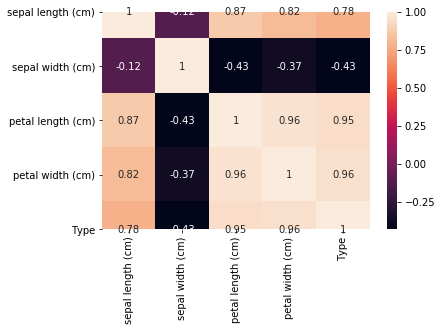

In [31]:
#correlation
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [32]:
#stattistical summary
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Exploratory Data Analysis

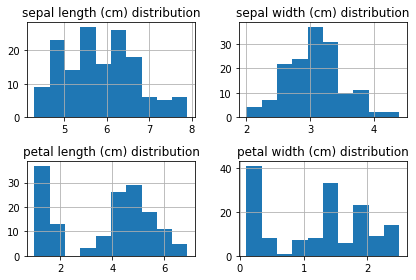

In [16]:
#data distribution

def histograms(data, variables, n_rows, n_cols):
    fig = plt.figure()
    for i, var_name in enumerate(data):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        data[var_name].hist(bins=10, ax=ax)
        ax.set_title(var_name+ ' distribution')
    fig.tight_layout()
    plt.show()

histograms(df, df.columns, 2,2)

Text(0, 0.5, 'Inertia level')

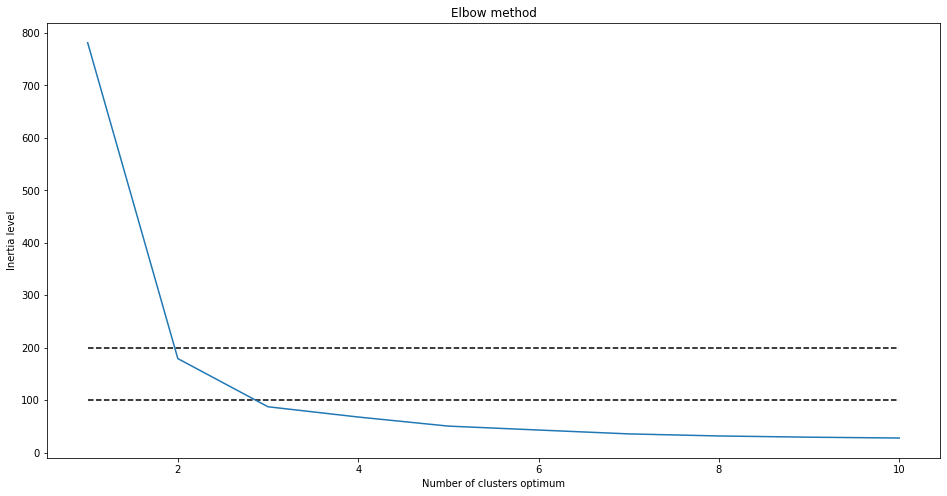

In [37]:
#preparing data

X = df.iloc[:,:].values

#finding optimum number of plots

from sklearn.cluster import KMeans
inertia = []
number_clusters = range(1,11)
for i in number_clusters :
    kmeans= KMeans(n_clusters=i, init = 'k-means++', 
                  max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
#plotting to find optimum number of clusters

plt.figure(figsize=[16,8])
plt.plot(number_clusters , inertia)
plt.hlines(100, number_clusters[0], number_clusters[-1], linestyle='dashed')
plt.hlines(200, number_clusters[0], number_clusters[-1], linestyle='dashed')
plt.title('Elbow method')
plt.xlabel('Number of clusters optimum')
plt.ylabel('Inertia level')


In [ ]:
# Optimum number of clusters is 3

# Modelling

In [27]:
#Fitting the model

kmeans = KMeans(n_clusters=3, max_iter=300, init='k-means++', n_init=10, random_state=0)

y_pred_kmeans = kmeans.fit_predict(X)

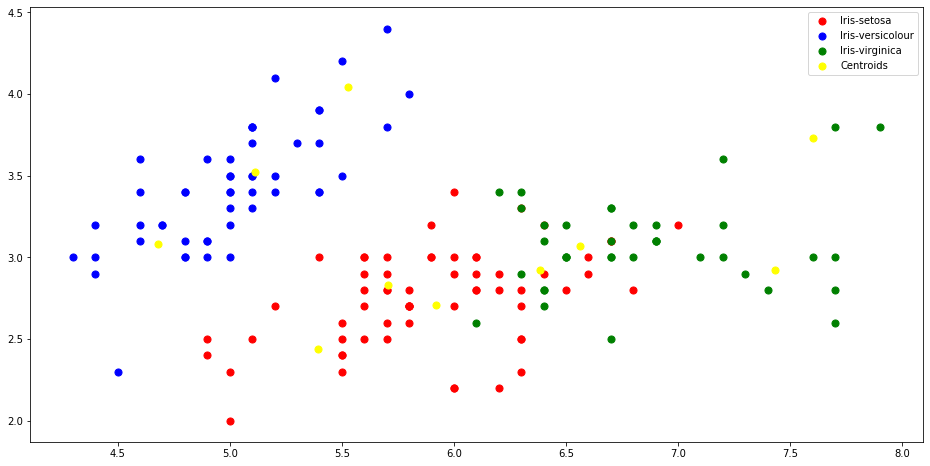

In [42]:
# Visualizing the results

plt.figure(figsize=[16,8])
plt.scatter(X[y_pred_kmeans == 0, 0], X[y_pred_kmeans == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_pred_kmeans == 1, 0], X[y_pred_kmeans == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_pred_kmeans == 2, 0], X[y_pred_kmeans == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'yellow', label = 'Centroids')

plt.legend()